# Importing necessary libraries

In [62]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import analysis_functions as analysis

# 1. Recommendation System with LSH

## 1.1 Data Preparation

### Main dataframe 

#### Loading

In [63]:
# Load the dataset for ratings and the one for movies
df_ratings = pd.read_csv("archive/rating.csv")
df_movies = pd.read_csv("archive/movie.csv")

# Creating main df for our analysis (for now)
main_df = pd.merge(df_ratings, df_movies, on="movieId")

FileNotFoundError: [Errno 2] No such file or directory: 'archive/rating.csv'

#### Analysis

In [ ]:
# view shape of df
analysis.find_shape(main_df)

(20000263, 6)

In [ ]:
 # check columns info and dtypes...
analysis.find_info(main_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  object 
 4   title      object 
 5   genres     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 915.5+ MB


In [ ]:
# calculate statistical summary for numerical columns and summary for non numeric columns
analysis.find_desc(main_df)

(             userId       movieId        rating
 count  2.000026e+07  2.000026e+07  2.000026e+07
 mean   6.904587e+04  9.041567e+03  3.525529e+00
 std    4.003863e+04  1.978948e+04  1.051989e+00
 min    1.000000e+00  1.000000e+00  5.000000e-01
 25%    3.439500e+04  9.020000e+02  3.000000e+00
 50%    6.914100e+04  2.167000e+03  3.500000e+00
 75%    1.036370e+05  4.770000e+03  4.000000e+00
 max    1.384930e+05  1.312620e+05  5.000000e+00,
                   timestamp                title    genres
 count              20000263             20000263  20000263
 unique             15351121                26729      1329
 top     1996-03-01 00:00:00  Pulp Fiction (1994)     Drama
 freq                    643                67310   1467402)

In [ ]:
# check df for null values
analysis.find_null_vals(main_df)

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [ ]:
# check df for duplicated rows
analysis.find_dup(main_df)

0

In [ ]:
# Check the number of unique users and movies
print(f"Number of unique users: {main_df['userId'].nunique()}")
print(f"Number of unique movies: {main_df['movieId'].nunique()}")


Number of unique users: 138493
Number of unique movies: 26744


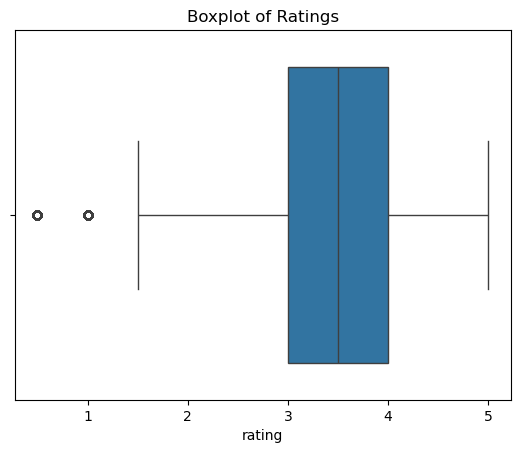

In [ ]:
# check for outliers
sns.boxplot(x=main_df['rating'])
plt.title('Boxplot of Ratings')
plt.show()

# values around 1 are considered outliers, because probably not a lot of movies have a low rating


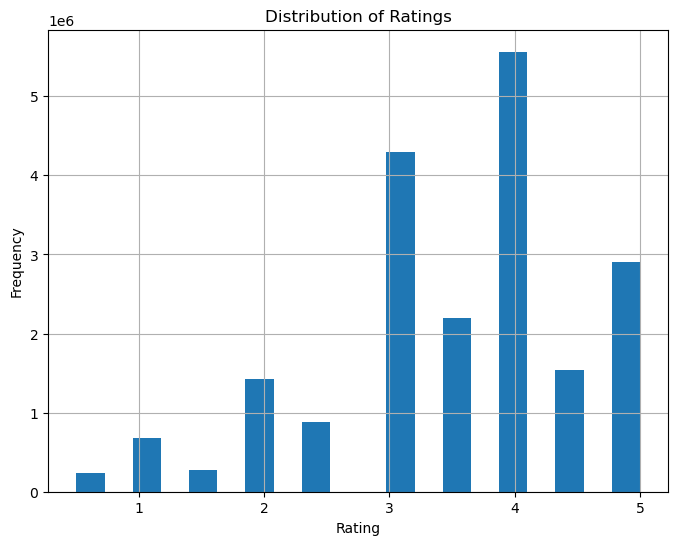

In [ ]:
# Histogram to visualise the frequency of each rating score 
main_df['rating'].hist(bins=20, figsize=(8, 6))
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# understand what is the lowest rating given 
main_df['rating'].min()

0.5

In [ ]:
# Check user activity (number of ratings per user)
user_activity = main_df['userId'].value_counts()
print(user_activity)

# Check movie popularity (number of ratings per movie)
movie_popularity = main_df['movieId'].value_counts()
print(movie_popularity)


userId
118205    9254
8405      7515
82418     5646
121535    5520
125794    5491
          ... 
89305       20
110463      20
96990       20
134747      20
6526        20
Name: count, Length: 138493, dtype: int64
movieId
296       67310
356       66172
318       63366
593       63299
480       59715
          ...  
125545        1
78873         1
112907        1
112909        1
110510        1
Name: count, Length: 26744, dtype: int64


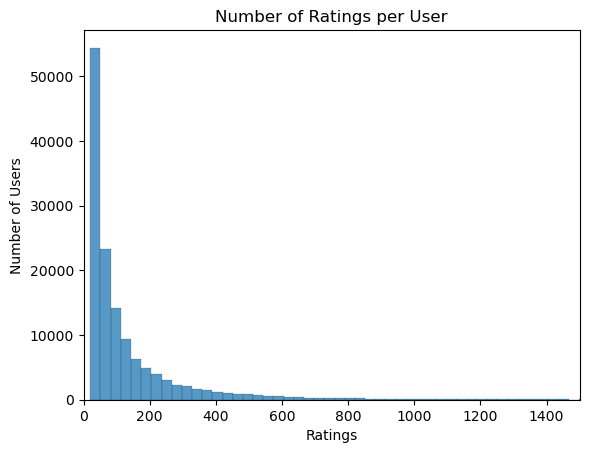

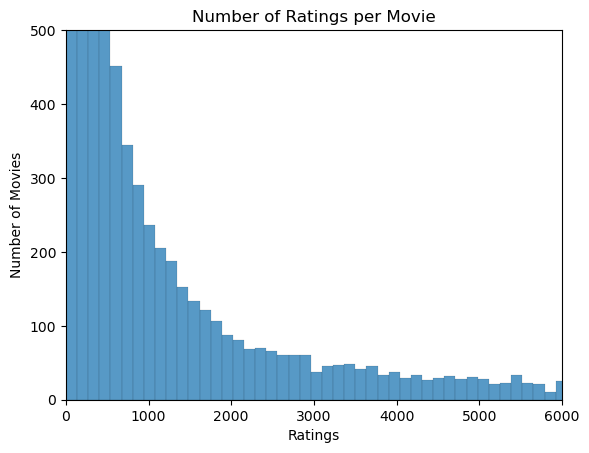

In [ ]:
# User activity visualised on graph
sns.histplot(user_activity, bins=300, kde=False)
plt.title('Number of Ratings per User')
plt.xlabel('Ratings')
plt.ylabel('Number of Users')
plt.xlim(0, 1500)
plt.show()

# Movie popularity visualised on graph
sns.histplot(movie_popularity, bins=500, kde=False)
plt.title('Number of Ratings per Movie')
plt.xlabel('Ratings')
plt.ylabel('Number of Movies')
plt.xlim(0, 6000)
plt.ylim(0, 500)
plt.show()

In [ ]:
# In the main_df description we can notice that drama is the top genre so we decide to dig a little deeper
drama_movies = main_df['genres'].str.contains('Drama')
display(main_df[drama_movies].head())
drama_movies.shape


,userId,movieId,rating,timestamp,title,genres
1,1,29,3.5,2005-04-02 23:31:16,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
6,1,151,4.0,2004-09-10 03:08:54,Rob Roy (1995),Action|Drama|Romance|War
8,1,253,4.0,2005-04-02 23:35:40,Interview with the Vampire: The Vampire Chroni...,Drama|Horror
10,1,293,4.0,2005-04-02 23:31:43,Léon: The Professional (a.k.a. The Professiona...,Action|Crime|Drama|Thriller
11,1,296,4.0,2005-04-02 23:32:47,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller


(20000263,)

In [ ]:
# Show the first 10 high rated movies
high_rated = main_df['rating']>4.0
main_df[high_rated].head(10)

,userId,movieId,rating,timestamp,title,genres
30,1,1196,4.5,2005-04-02 23:32:22,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi
31,1,1198,4.5,2005-04-02 23:30:24,Raiders of the Lost Ark (Indiana Jones and the...,Action|Adventure
131,1,4993,5.0,2005-04-02 23:31:22,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy
142,1,5952,5.0,2005-04-02 23:30:19,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy
158,1,7153,5.0,2005-04-02 23:30:33,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy
170,1,8507,5.0,2004-09-10 03:13:47,Freaks (1932),Crime|Drama|Horror
171,1,8636,4.5,2005-04-02 23:44:53,Spider-Man 2 (2004),Action|Adventure|Sci-Fi|IMAX
176,2,62,5.0,2000-11-21 15:29:58,Mr. Holland's Opus (1995),Drama
177,2,70,5.0,2000-11-21 15:31:31,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
180,2,260,5.0,2000-11-21 15:36:54,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi


In [ ]:
# show the top 10 most rated movies
most_rated = main_df.groupby('title').size().sort_values(ascending=False)[:10]
most_rated

title
Pulp Fiction (1994)                          67310
Forrest Gump (1994)                          66172
Shawshank Redemption, The (1994)             63366
Silence of the Lambs, The (1991)             63299
Jurassic Park (1993)                         59715
Star Wars: Episode IV - A New Hope (1977)    54502
Braveheart (1995)                            53769
Terminator 2: Judgment Day (1991)            52244
Matrix, The (1999)                           51334
Schindler's List (1993)                      50054
dtype: int64

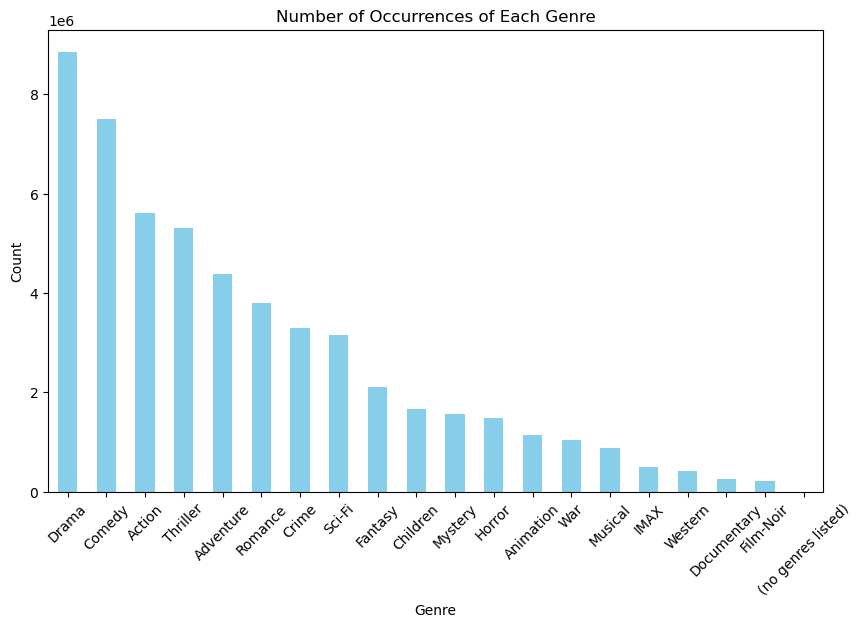

In [ ]:
# Split the genres column and count occurrences
# Create a flat list of all genres
all_genres = main_df['genres'].str.split('|').explode()

# Count the occurrences of each genre
genre_counts = all_genres.value_counts()

# Visualize the counts using a bar chart
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Occurrences of Each Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### Handling timestamps

In [ ]:
# Handle the timestamp column converting it to datetime
main_df['timestamp'] = pd.to_datetime(main_df['timestamp']) 
print(df_ratings['timestamp'].head())

# checking dtype of timestamp column changed
main_df.info()

# not needed it until now...
''' 
# Extract useful time-based features (e.g., year, month)
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['second'] = df['timestamp'].dt.second
print(df.head())
'''


0    2005-04-02 23:53:47
1    2005-04-02 23:31:16
2    2005-04-02 23:33:39
3    2005-04-02 23:32:07
4    2005-04-02 23:29:40
Name: timestamp, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 6 columns):
 #   Column     Dtype         
---  ------     -----         
 0   userId     int64         
 1   movieId    int64         
 2   rating     float64       
 3   timestamp  datetime64[ns]
 4   title      object        
 5   genres     object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 915.5+ MB


" \n# Extract useful time-based features (e.g., year, month)\ndf['year'] = df['timestamp'].dt.year\ndf['month'] = df['timestamp'].dt.month\ndf['day_of_week'] = df['timestamp'].dt.dayofweek\ndf['day'] = df['timestamp'].dt.day\ndf['hour'] = df['timestamp'].dt.hour\ndf['minute'] = df['timestamp'].dt.minute\ndf['second'] = df['timestamp'].dt.second\nprint(df.head())\n"

### Other dataframes

#### Loading

In [ ]:
# Load the rest of the dfs
all_dfs = []
df_genome_scores = pd.read_csv("archive/genome_scores.csv")
df_genome_tags = pd.read_csv("archive/genome_tags.csv")
df_links = pd.read_csv("archive/link.csv")
df_tags = pd.read_csv("archive/tag.csv")
all_dfs.append(("genome_scores", df_genome_scores))
all_dfs.append(("genome_tags", df_genome_tags))
all_dfs.append(("links", df_links))
all_dfs.append(("tags", df_tags))

#### Analysis

In [ ]:
# Analyse the rest of the df information
for df_name, dataframe in all_dfs:
    print("--------", df_name, "------------")
    print("--------- df shape")
    print(analysis.find_shape(dataframe))
    print("--------- df info")
    print(analysis.find_info(dataframe))
    print("--------- df description")
    print(analysis.find_desc(dataframe))
    print("--------- df null count")
    print(analysis.find_null_vals(dataframe))
    print("--------- df duplicate count")
    print(analysis.find_dup(dataframe))
    

-------- genome_scores ------------
--------- df shape
(11709768, 3)
--------- df info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11709768 entries, 0 to 11709767
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 268.0 MB
None
--------- df description
            movieId         tagId     relevance
count  1.170977e+07  1.170977e+07  1.170977e+07
mean   2.584297e+04  5.645000e+02  1.164833e-01
std    3.467615e+04  3.256254e+02  1.542463e-01
min    1.000000e+00  1.000000e+00  2.500000e-04
25%    2.926000e+03  2.827500e+02  2.425000e-02
50%    6.017000e+03  5.645000e+02  5.650000e-02
75%    4.606200e+04  8.462500e+02  1.415000e-01
max    1.311700e+05  1.128000e+03  1.000000e+00
None
--------- df null count
movieId      0
tagId        0
relevance    0
dtype: int64
--------- df duplicate count
0
-------- genome_tags ------------
--------- df 

We notice that the links and tags df contains null values, so we handle it in this phase 

#### Cleaning

In [ ]:
# We fill nan values with empty space in order not to lose any important information
df_links.fillna(" ")

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
27273,131254,466713,4436.0
27274,131256,277703,9274.0
27275,131258,3485166,285213.0
27276,131260,249110,32099.0


In [ ]:
# We drop nan values because they are very few and this df only contains information on tags, 
# and if the tag is not present, the row doesnt make sense
df_tags.dropna()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18
...,...,...,...,...
465559,138446,55999,dragged,2013-01-23 23:29:32
465560,138446,55999,Jason Bateman,2013-01-23 23:29:38
465561,138446,55999,quirky,2013-01-23 23:29:38
465562,138446,55999,sad,2013-01-23 23:29:32


**Further analysis of these dfs can be added if needed later on in the project**

## 1.2 Minhash Signatures

---
# 2. Grouping Movies Together!
In this section, you will explore clustering algorithms to group the movies you have based on specific features you choose to consider for them.

## 2.1 Feature Engineering
As you know, the dataset provided isn’t particularly clean or well-structured to represent the features of the movies. Therefore, your first step is to create a more suitable set of attributes (variables, features, covariates) to represent the movies based on the available information. Here are some variables or features you might consider for clustering:

1. movieid id of each movie
2. genres list of genres attached to the movie (given that a movie may have several genres, it’s essential to devise a method to accurately represent the genres for each movie)
3. ratings_avg the average ratings provided by users for the movie
4. relevant_genome_tag the most relevant tag to the movie given in the genome set
5. common_user_tag the most common tag given to the movie by the users

In addition to the above features, include at least three additional features for clustering.

Note: If you have accurately identified and applied the methods for representing the features, you should have more than eight features! How could this happen? Take a moment to think about it.

In [2]:
import pandas as pd

# First we load all the datasets downloaded
tag = pd.read_csv('/Users/augustodeluzenberger/Documents/Python/archive/tag.csv')
rating = pd.read_csv('/Users/augustodeluzenberger/Documents/Python/archive/rating.csv')
movie = pd.read_csv('/Users/augustodeluzenberger/Documents/Python/archive/movie.csv')
link = pd.read_csv('/Users/augustodeluzenberger/Documents/Python/archive/link.csv')
genome_scores = pd.read_csv('/Users/augustodeluzenberger/Documents/Python/archive/genome_scores.csv')
genome_tags = pd.read_csv('/Users/augustodeluzenberger/Documents/Python/archive/genome_tags.csv')


In [3]:
# The movie dataset contains the sequent informations:
movies_df = movie.copy()
display(movies_df.head())
print(f"Are there any NAs in the dataset?:\n{movies_df.isna().any()}\n")
print(f"How many movies are in this df? {len(movies_df["movieId"].unique())}\n")


# We create a one-hot encodeing of the genres column
genres_split = movies_df['genres'].str.get_dummies('|') # Each variable is converted in as many 0/1 variables as there are different values. Columns in the output are each named after a value
print('Here is the one hot encoded variable:')
display(genres_split)
movies_df = pd.concat([movies_df, genres_split], axis=1) # we add the new columns to the df



,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Are there any NAs in the dataset?:
movieId    False
title      False
genres     False
dtype: bool

How many movies are in this df? 27278

Here is the one hot encoded variable:


,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27273,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27274,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27275,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27276,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
# To get the avg rating we need to take a look at the rating dataset
display(rating.head())
print(f"Are there any NAs in the dataset?:\n{rating.isna().any()}\n")
print(f"How many movies are in this df? {len(rating["movieId"].unique())}")
# there are no NA so we can continue

ratings_grouped = rating.groupby('movieId')['rating'] #group by movieid
ratings_avg = ratings_grouped.mean().reset_index() #get the mean for each group and reset index

ratings_avg.columns = ['movieId', 'ratings_avg'] #rename the columns

movies_df = pd.merge(movies_df, ratings_avg, on='movieId', how='left') #merge with our previous dataset using the column movieId as index, "left" means that the function will use only keys from the first df



,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


Are there any NAs in the dataset?:
userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

How many movies are in this df? 26744


In [5]:
# Now lets look at the genome_scores and genome_tag df:
display(genome_scores.head())
print(f"Are there any NAs in the dataset?:\n{genome_scores.isna().any()}\n")
display(genome_tags.head())
print(f"Are there any NAs in the dataset?:\n{genome_tags.isna().any()}\n")


print(f"Check that the two df have compatible indexes, comparing number of unique tagIds: {len(genome_tags['tagId'].unique())}, {len(genome_scores['tagId'].unique())}")

#we need to merge the two df
genome_full = pd.merge(genome_scores, genome_tags, how= 'left', on='tagId')


,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675


Are there any NAs in the dataset?:
movieId      False
tagId        False
relevance    False
dtype: bool



,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


Are there any NAs in the dataset?:
tagId    False
tag      False
dtype: bool

Check that the two df have compatible indexes, comparing number of unique tagIds: 1128, 1128


In [6]:
#we want the most relevant tag for each movie, so we will only take the ones with the highest relevance scores
genome_full_grouped = genome_full.groupby('movieId')
max_row_indexes = genome_full_grouped['relevance'].idxmax() #we get the indexes of the maximum values for each group
relevant_tags = genome_full.loc[max_row_indexes][['movieId', 'tag']]
relevant_tags.columns = ['movieId', 'relevant_genome_tag']
#now we merge
movies_df = pd.merge(movies_df, relevant_tags , on='movieId', how='left')


In [7]:
# to get the most common user tag we can still work with tag df
display(tag.head())
print(f"Are there any NAs in the dataset?:\n{tag.isna().any()}\n")
tag = tag.dropna(subset=['tag'])
print(f"How many movies are in this df? {len(tag["movieId"].unique())}")

#we group by movieId and tag
new_tag = tag.groupby(["movieId", "tag"])

tag_counts = new_tag.size().reset_index(name='count') #this counts the number of rows for each group

most_common_tag = tag_counts.loc[tag_counts.groupby('movieId')['count'].idxmax()][['movieId', 'tag']]

most_common_tag.columns = ['movieId', 'common_user_tag'] #we rename the two columns

movies_df = pd.merge(movies_df, most_common_tag, on='movieId', how='left') 

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


Are there any NAs in the dataset?:
userId       False
movieId      False
tag           True
timestamp    False
dtype: bool

How many movies are in this df? 19545


### Some additional features:

In [8]:
# bonus feature n_1 : Total number of ratings per movie
total_ratings = rating.groupby('movieId')['rating'].count().reset_index()
total_ratings.columns = ['movieId', 'total_ratings']
movies_df = pd.merge(movies_df, total_ratings, on='movieId', how='left')

# bonus feature n_2 : Number of unique users who tagged the movie
unique_users_tagged = tag.groupby('movieId')['userId'].nunique().reset_index()
unique_users_tagged.columns = ['movieId', 'unique_users_tagged']
movies_df = pd.merge(movies_df, unique_users_tagged, on='movieId', how='left')

# bonus feature n_3 : Variance of rating scores per movie
rating_variance = rating.groupby('movieId')['rating'].var().reset_index()
rating_variance.columns = ['movieId', 'rating_variance']
movies_df = pd.merge(movies_df, rating_variance, on='movieId', how='left')

# Since we use "left" as a parameter in the function merge we conserved the movieIds from the df movie_df
# This has created many NAs values inside the newly merged df because the dataframes we merged with had a smaller dimension
# We could have avoided this by using "inner" instead, but would have lost many rows containing the one-hot encoded genres
# So we will simply fill in the NAs with some costum values
movies_df.fillna({'ratings_avg': movies_df['ratings_avg'].mean(), 'relevant_genome_tag': '', 'common_user_tag': '', 'total_ratings': movies_df['total_ratings'].mean(), 'rating_variance': movies_df['rating_variance'].mean() , 'unique_users_tagged': movies_df['unique_users_tagged'].mean()}, inplace=True)

# Final dataset ready for clustering
display(movies_df.head())


,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Sci-Fi,Thriller,War,Western,ratings_avg,relevant_genome_tag,common_user_tag,total_ratings,unique_users_tagged,rating_variance
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,3.921240,toys,Pixar,49695.0,152.0,0.790342
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,3.211977,adventure,Robin Williams,22243.0,46.0,0.904686
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,3.151040,good sequel,moldy,12735.0,15.0,1.013328
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,2.861393,women,characters,2756.0,4.0,1.200563
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,3.064592,good sequel,steve martin,12161.0,11.0,0.964598


---
## 2.2 Choose your features (variables)!
With multiple features available for the movies, you need to consider the following two questions: 1. Should you normalize the data or leave it as is? 2. Should you include all these features, or can you reduce the dimensionality of the data?

- What is the importance of normalizing the data in your analysis, and how does it impact the effectiveness of the clustering algorithms you plan to use?
- If you find that normalizing the values is beneficial, please proceed to normalize the data. To simplify this task, refer to the scikit-learn package for tools and functions that facilitate data normalization.
- Could you provide some insights on dimensionality reduction? What techniques would be effective for reducing the number of features in the dataset, and why might this be beneficial for the analysis?
- If you believe dimensionality reduction would be advantageous, please select a method to reduce the dimensionality of the data.

## What is the importance of normalizing the data in your analysis, and how does it impact the effectiveness of the clustering algorithms you plan to use?

### ANSWER: 
Normalizing is useful when the data we are working with has very different scales. Normalization rescales the features to ensure that all of them contribute equally to the clustering process. For example, if we are working with ratings_avg (ranging from 0-5) and total_ratings (which could be in the hundreds or thousands), the distance calculations used in clustering would be dominated by total_ratings purely due to its larger scale. Since later on we will be working with K-means it's a good idea to normalize the data.



In [9]:
# let's take a look at some statistics for each column of our df
movies_df.describe()

,movieId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,ratings_avg,total_ratings,unique_users_tagged,rating_variance
count,27278.000000,27278.000000,27278.000000,27278.000000,27278.000000,27278.000000,27278.000000,27278.000000,27278.000000,27278.000000,...,27278.000000,27278.000000,27278.000000,27278.000000,27278.000000,27278.000000,27278.000000,27278.000000,27278.000000,27278.000000
mean,59855.480570,0.009018,0.129042,0.085380,0.037649,0.041755,0.306987,0.107743,0.090586,0.489185,...,0.055503,0.151294,0.063898,0.153164,0.043772,0.024782,3.133200,747.841123,8.944948,0.946540
std,44429.314697,0.094537,0.335252,0.279452,0.190350,0.200033,0.461253,0.310061,0.287024,0.499892,...,0.228963,0.358342,0.244575,0.360152,0.204590,0.155463,0.657552,3055.463542,17.798064,0.594020
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,1.000000,1.000000,0.000000
25%,6931.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.814013,3.000000,2.000000,0.674858
50%,68068.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.214286,20.000000,6.000000,0.946540
75%,100293.250000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.555556,238.000000,8.944948,1.086477
max,131262.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,67310.000000,561.000000,10.125000


In [10]:
from sklearn.preprocessing import StandardScaler

# Selecting the columns that need normalization
features_to_normalize = ['ratings_avg', 'total_ratings', 'rating_variance', 'unique_users_tagged'] + list(genres_split.columns)


We will normalize the one hot encoded genres list too as we will apply PCA dimensional reduction to them. PCA is sensitive to the scales of the variables so if we don't normalize our data before applying it, features with higher numerical ranges will contribute more to the variance, potentially misleading it.

In [11]:

# Normalizing selected features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(movies_df[features_to_normalize])

# Creating a new DataFrame with normalized features
normalized_df = pd.DataFrame(normalized_features, columns=features_to_normalize)
movies_df_normalized = pd.concat([movies_df[['movieId', 'title', 'relevant_genome_tag', 'common_user_tag']], normalized_df], axis=1)

In [13]:
display(movies_df_normalized.describe())
display(normalized_df.head())

,movieId,ratings_avg,total_ratings,rating_variance,unique_users_tagged,(no genres listed),Action,Adventure,Animation,Children,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,27278.000000,2.727800e+04,2.727800e+04,2.727800e+04,2.727800e+04,27278.000000,2.727800e+04,2.727800e+04,2.727800e+04,2.727800e+04,...,2.727800e+04,2.727800e+04,2.727800e+04,2.727800e+04,2.727800e+04,2.727800e+04,2.727800e+04,2.727800e+04,2.727800e+04,2.727800e+04
mean,59855.480570,2.375596e-16,-1.667085e-17,1.010670e-16,8.335423e-18,0.000000,-1.052347e-16,-3.542555e-17,-6.251567e-18,-5.418025e-17,...,2.083856e-18,-1.250313e-17,-1.771277e-17,-2.500627e-17,-4.506338e-17,-9.168966e-17,8.856387e-18,8.960580e-17,6.564146e-17,5.782700e-17
std,44429.314697,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,...,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00
min,1.000000,-4.004625e+00,-2.444326e-01,-1.593479e+00,-4.464021e-01,-0.095396,-3.849164e-01,-3.055330e-01,-1.977936e-01,-2.087456e-01,...,-1.106608e-01,-3.253458e-01,-8.507220e-02,-1.986925e-01,-2.424132e-01,-4.222137e-01,-2.612647e-01,-4.252832e-01,-2.139514e-01,-1.594102e-01
25%,6931.250000,-4.854267e-01,-2.437780e-01,-4.573709e-01,-3.902152e-01,-0.095396,-3.849164e-01,-3.055330e-01,-1.977936e-01,-2.087456e-01,...,-1.106608e-01,-3.253458e-01,-8.507220e-02,-1.986925e-01,-2.424132e-01,-4.222137e-01,-2.612647e-01,-4.252832e-01,-2.139514e-01,-1.594102e-01
50%,68068.000000,1.233168e-01,-2.382141e-01,0.000000e+00,-1.654675e-01,-0.095396,-3.849164e-01,-3.055330e-01,-1.977936e-01,-2.087456e-01,...,-1.106608e-01,-3.253458e-01,-8.507220e-02,-1.986925e-01,-2.424132e-01,-4.222137e-01,-2.612647e-01,-4.252832e-01,-2.139514e-01,-1.594102e-01
75%,100293.250000,6.423271e-01,-1.668652e-01,2.355806e-01,0.000000e+00,-0.095396,-3.849164e-01,-3.055330e-01,-1.977936e-01,-2.087456e-01,...,-1.106608e-01,-3.253458e-01,-8.507220e-02,-1.986925e-01,-2.424132e-01,-4.222137e-01,-2.612647e-01,-4.252832e-01,-2.139514e-01,-1.594102e-01
max,131262.000000,2.839068e+00,2.178503e+01,1.545173e+01,3.101827e+01,10.482661,2.597967e+00,3.272969e+00,5.055775e+00,4.790520e+00,...,9.036626e+00,3.073652e+00,1.175472e+01,5.032903e+00,4.125188e+00,2.368469e+00,3.827536e+00,2.351374e+00,4.673959e+00,6.273123e+00


,ratings_avg,total_ratings,rating_variance,unique_users_tagged,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1.198467,16.019846,-0.262957,8.037822,-0.095396,-0.384916,3.272969,5.055775,4.790520,1.502486,...,-0.110661,-0.325346,-0.085072,-0.198692,-0.242413,-0.422214,-0.261265,-0.425283,-0.213951,-0.15941
1,0.119805,7.035120,-0.070460,2.082009,-0.095396,-0.384916,3.272969,-0.197794,4.790520,-0.665564,...,-0.110661,-0.325346,-0.085072,-0.198692,-0.242413,-0.422214,-0.261265,-0.425283,-0.213951,-0.15941
2,0.027132,3.923260,0.112437,0.340215,-0.095396,-0.384916,-0.305533,-0.197794,-0.208746,1.502486,...,-0.110661,-0.325346,-0.085072,-0.198692,-0.242413,2.368469,-0.261265,-0.425283,-0.213951,-0.15941
3,-0.413369,0.657247,0.427642,-0.277841,-0.095396,-0.384916,-0.305533,-0.197794,-0.208746,1.502486,...,-0.110661,-0.325346,-0.085072,-0.198692,-0.242413,2.368469,-0.261265,-0.425283,-0.213951,-0.15941
4,-0.104341,3.735397,0.030400,0.115467,-0.095396,-0.384916,-0.305533,-0.197794,-0.208746,1.502486,...,-0.110661,-0.325346,-0.085072,-0.198692,-0.242413,-0.422214,-0.261265,-0.425283,-0.213951,-0.15941


Now to know how many Principal Components we need, it's a good idea to run some testing.

In [ ]:

from sklearn.decomposition import PCA

# Applying PCA to reduce dimensionality to, say, 10 principal components
pca = PCA(n_components=10)
reduced_features = pca.fit_transform(normalized_features)

# Creating a DataFrame with the reduced features
reduced_df = pd.DataFrame(reduced_features, columns=[f'PC{i+1}' for i in range(10)])
movies_df_reduced = pd.concat([movies_df[['movieId', 'title', 'relevant_genome_tag', 'common_user_tag']], reduced_df], axis=1)

print(movies_df_reduced.head())



   movieId                               title relevant_genome_tag  \
0        1                    Toy Story (1995)                toys   
1        2                      Jumanji (1995)           adventure   
2        3             Grumpier Old Men (1995)         good sequel   
3        4            Waiting to Exhale (1995)               women   
4        5  Father of the Bride Part II (1995)         good sequel   

  common_user_tag        PC1       PC2       PC3       PC4       PC5  \
0           Pixar  14.928050  0.869527 -8.720548 -4.300976 -1.738947   
1  Robin Williams   7.316307 -1.015626 -3.143414 -0.452047 -0.122983   
2           moldy   1.244955  0.148742 -2.230705 -2.334762 -2.040790   
3      characters  -0.731175 -0.410494 -1.313653 -0.356871 -2.074801   
4    steve martin   1.290004  0.164818 -1.346183 -2.252120 -0.966363   

        PC6       PC7       PC8       PC9      PC10  
0 -3.341017 -1.912905  3.512786  1.574909 -3.583586  
1 -1.471171 -1.305253  1.475525  1.217

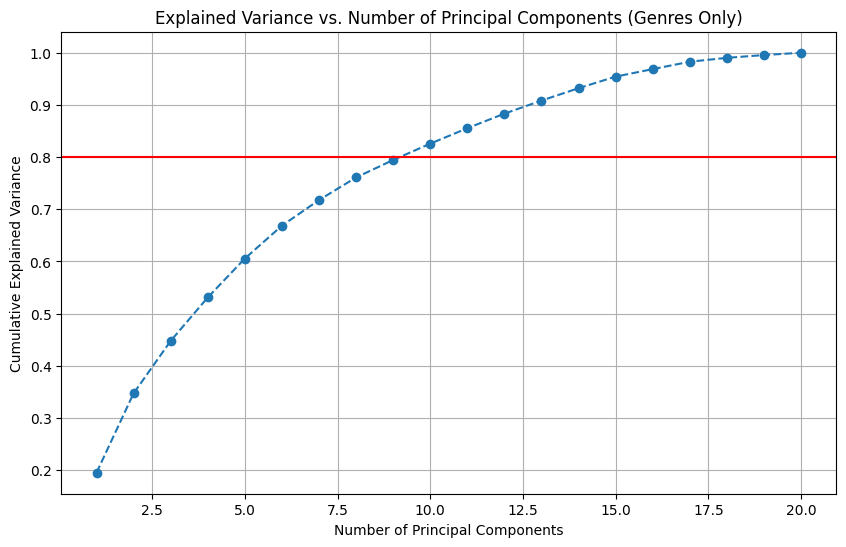

Optimal number of Principal Components for genres: 10
Principal Component 1: Explained Variance = 0.1951
Principal Component 2: Explained Variance = 0.1521
Principal Component 3: Explained Variance = 0.1005
Principal Component 4: Explained Variance = 0.0833
Principal Component 5: Explained Variance = 0.0746
Principal Component 6: Explained Variance = 0.0630
Principal Component 7: Explained Variance = 0.0491
Principal Component 8: Explained Variance = 0.0433
Principal Component 9: Explained Variance = 0.0335
Principal Component 10: Explained Variance = 0.0313
   movieId                               title relevant_genome_tag  \
0        1                    Toy Story (1995)                toys   
1        2                      Jumanji (1995)           adventure   
2        3             Grumpier Old Men (1995)         good sequel   
3        4            Waiting to Exhale (1995)               women   
4        5  Father of the Bride Part II (1995)         good sequel   

  common_user_

In [17]:
### Now to know how many Principal Components we need, it's a good idea to run some testing.

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Applying PCA only to the one-hot encoded genres (genres_split columns)
genres_split_columns = genres_split.columns
pca_full = PCA()
reduced_genres_full = pca_full.fit_transform(movies_df[genres_split_columns])

# Plotting the cumulative explained variance to determine the optimal number of components
explained_variance_ratio_cumsum = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio_cumsum) + 1), explained_variance_ratio_cumsum, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Principal Components (Genres Only)')
plt.grid(True)
plt.axhline(y=0.8, color='r', linestyle='-')  # Add a horizontal line for 95% explained variance
plt.show()

# Choosing an appropriate number of components (e.g., that explains at least 95% of variance)
n_components_optimal = np.argmax(explained_variance_ratio_cumsum >= 0.8) + 1
print(f'Optimal number of Principal Components for genres: {n_components_optimal}')

# Applying PCA again with the optimal number of components
pca = PCA(n_components=n_components_optimal)
reduced_genres = pca.fit_transform(movies_df[genres_split_columns])

# Creating a DataFrame with the reduced features
reduced_genres_df = pd.DataFrame(reduced_genres, columns=[f'Genre_PC{i+1}' for i in range(n_components_optimal)])

# Adding the reduced genre components back to the main DataFrame
movies_df_reduced = pd.concat([movies_df[['movieId', 'title', 'relevant_genome_tag', 'common_user_tag']], reduced_genres_df], axis=1)

# Printing the explained variance for each principal component
explained_variance_ratio = pca.explained_variance_ratio_
for i, variance in enumerate(explained_variance_ratio, start=1):
    print(f'Principal Component {i}: Explained Variance = {variance:.4f}')

print(movies_df_reduced.head())


---
## 2.3 Clustering
Now that you have prepared the data, you can create the clusters.

- How can you determine the optimal number of clusters for your data? Please use at least two methods and provide their results.
- Implement the K-means clustering algorithm (not K-means++) through MapReduce. We request that you develop the algorithm from scratch based on what you've learned in class and run the algorithm on your data.
- Implement the K-means++ algorithm from scratch and apply it to your data. Do you notice any differences between the results obtained using random initialization and those achieved with K-means++? Please explain your observations and discuss why these differences might occur.
- Ask an LLM (ChatGPT, Claude AI, Gemini, Perplexity, etc.) to recommend another clustering algorithm. Use that LLM to describe the workings of the algorithm, as well as its advantages and disadvantages compared to K-means and K-means++. Additionally, ask to implement the algorithm for you or utilize an existing version from a package. Apply that algorithm to your data and explain any differences you observe in the results compared to those obtained previously.

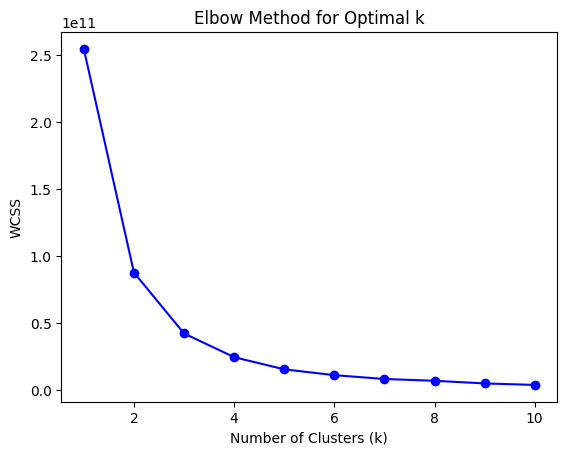

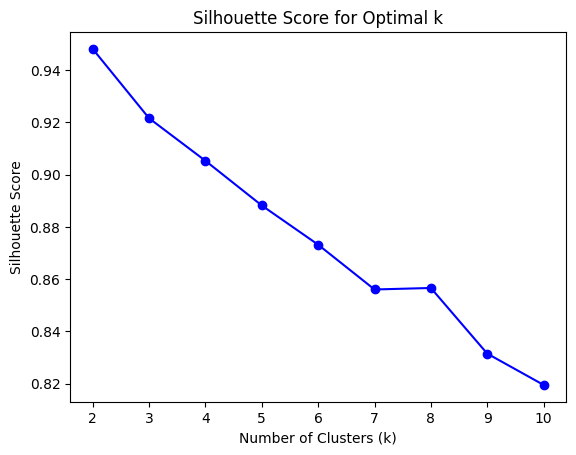

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Extracting only numerical features for clustering
features = movies_df.select_dtypes(include=['float64', 'int64']).drop(columns=['movieId'])

# Elbow Method
wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

plt.plot(k_values, wcss, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

# Silhouette Score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(features)
    silhouette_scores.append(silhouette_score(features, cluster_labels))

plt.plot(range(2, 11), silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()


In [ ]:
import numpy as np

def initialize_centroids(features, k):
    """Randomly initialize k centroids from the dataset."""
    return features.sample(n=k).to_numpy()

def assign_clusters(features, centroids):
    """Assign each data point to the nearest centroid."""
    distances = np.linalg.norm(features.to_numpy()[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(features, labels, k):
    """Calculate new centroids as the mean of the points in each cluster."""
    new_centroids = []
    for i in range(k):
        cluster_points = features[labels == i]
        new_centroids.append(cluster_points.mean(axis=0))
    return np.array(new_centroids)

def kmeans(features, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(features, k)
    for _ in range(max_iters):
        labels = assign_clusters(features, centroids)
        new_centroids = update_centroids(features, labels, k)
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        centroids = new_centroids
    return labels, centroids

# Applying K-means with a chosen number of clusters, say 5
k = 5
features_np = features.reset_index(drop=True)
labels, centroids = kmeans(features_np, k)

# Adding cluster labels to the DataFrame
movies_df['kmeans_cluster'] = labels
print(movies_df.head())


   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  (no genres listed)  Action  \
0  Adventure|Animation|Children|Comedy|Fantasy                   0       0   
1                   Adventure|Children|Fantasy                   0       0   
2                               Comedy|Romance                   0       0   
3                         Comedy|Drama|Romance                   0       0   
4                                       Comedy                   0       0   

   Adventure  Animation  Children  Comedy  Crime  ...  Thriller  War  Western  \
0          1          1         1       1      0  ...         0    0        0   
1          1          0         1       0      0  ...         0    0

In [ ]:
def initialize_centroids_plus_plus(features, k):
    """Initialize k centroids using the K-means++ algorithm."""
    centroids = [features.sample(n=1).to_numpy().flatten()]
    for _ in range(1, k):
        distances = np.array([min([np.inner(c - x, c - x) for c in centroids]) for x in features.to_numpy()])
        probabilities = distances / distances.sum()
        cumulative_probabilities = probabilities.cumsum()
        r = np.random.rand()
        for i, p in enumerate(cumulative_probabilities):
            if r < p:
                centroids.append(features.iloc[i].to_numpy())
                break
    return np.array(centroids)

# Applying K-means++ initialization
centroids_pp = initialize_centroids_plus_plus(features_np, k)
labels_pp, centroids_pp = kmeans(features_np, k, centroids_pp)

# Adding cluster labels to the DataFrame
movies_df['kmeans_pp_cluster'] = labels_pp
print(movies_df.head())



TypeError: only integer scalar arrays can be converted to a scalar index

---
## 2.4 Best Algorithm
Clustering helps identify natural groupings within data, but no single algorithm works best for every dataset. In this section, you’ll learn how to choose the most suitable clustering method based on your data’s unique characteristics. By analyzing patterns and comparing results, you’ll uncover which algorithm provides the most meaningful insights and clusters.


1. Set the number of clusters to the optimal number $k_{opt}$ based on any of the methods previously.
2. Select three distinct metrics to assess the quality of the clusters. Describe each metric in detail, including the specific aspects they evaluate to determine the effectiveness of the clustering model.
3. Apply the three clustering algorithms used in the prior section to partition the data into $k_{opt}$ clusters. Then, evaluate each model's clustering quality using the selected metrics. Summarize your findings by comparing the results of each algorithm based on the metric evaluations.